## 部分依赖图 (Partial Dependence Plots)

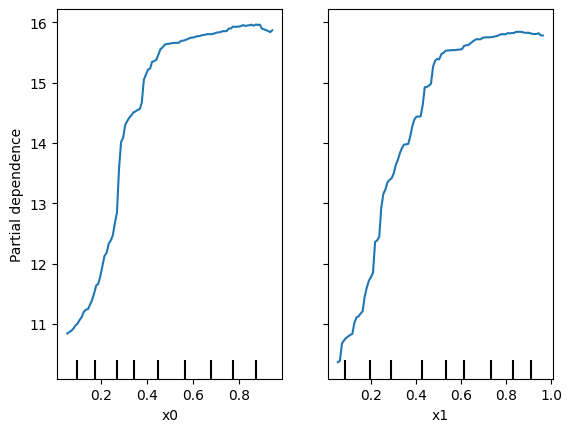

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# 生成数据
X, y = make_friedman1(n_samples=500, n_features=10, random_state=42)

# 训练模型
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# 计算部分依赖
features = [0, 1]  # 选取第0和第1个特征
pdp_results = partial_dependence(model, X, features)

# 可视化部分依赖图
disp = PartialDependenceDisplay.from_estimator(model, X, features)
plt.show()


Feature 0: Importance = 11.0926
Feature 1: Importance = 11.4331
Feature 2: Importance = 1.1075
Feature 3: Importance = 14.5547
Feature 4: Importance = 4.3831
Feature 5: Importance = 0.1253
Feature 6: Importance = 0.1813
Feature 7: Importance = 0.1412
Feature 8: Importance = 0.0924
Feature 9: Importance = 0.1273


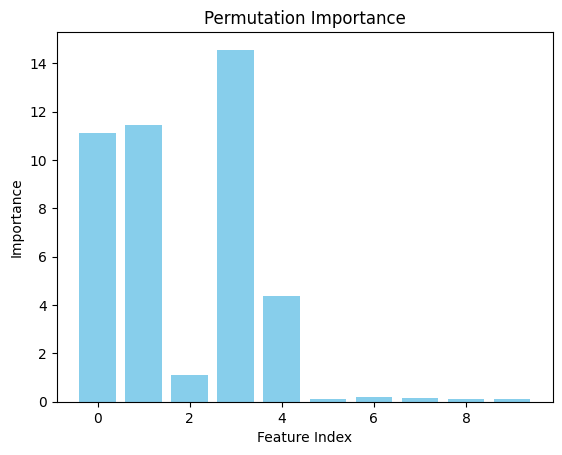

In [2]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

# 计算特征重要性
perm_importance = permutation_importance(model, X, y, scoring='neg_mean_squared_error', random_state=42)

# 打印重要性
for i in range(len(perm_importance.importances_mean)):
    print(f"Feature {i}: Importance = {perm_importance.importances_mean[i]:.4f}")

# 可视化特征重要性
plt.bar(range(X.shape[1]), perm_importance.importances_mean, color='skyblue')
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Permutation Importance")
plt.show()


以下是 Scikit-learn 中 **模型解释性工具** 的代码实现和原理解析，包括 `partial_dependence` 和 `permutation_importance`。

---

### **1. 部分依赖图 (Partial Dependence Plots)**

#### **原理**
- **部分依赖图**:
  - 描述特定特征与目标变量的关系。
  - 通过固定其他特征并改变目标特征值，观察预测值的变化。
  - **适用场景**:
    - 用于解释模型中特定特征的影响。

- **优点**:
  - 直观，易于理解。
  - 可以应用于黑盒模型（如随机森林、XGBoost）。
- **缺点**:
  - 仅能展示低维度（1D 或 2D）特征的关系。
  - 计算开销较大，尤其是高维数据。

---

### **2. 特征重要性 (Permutation Importance)**

#### **原理**
- **Permutation Importance**:
  - 随机打乱某个特征的值，然后观察模型性能的变化。
  - 如果打乱后模型性能大幅下降，说明该特征重要。
  - **适用场景**:
    - 评估特征对模型预测的贡献。

- **优点**:
  - 不依赖于模型结构。
  - 可以应用于任何模型。
- **缺点**:
  - 需要多次重新预测，计算开销大。

---

### **完整运行流程**
1. **训练模型**:
   - 使用一个黑盒模型（如随机森林）或白盒模型（如线性回归）。
2. **计算解释性指标**:
   - 部分依赖图：分析特定特征与目标值的关系。
   - 特征重要性：量化特征对模型性能的贡献。
3. **可视化**:
   - 部分依赖图：展示单变量或多变量依赖关系。
   - 特征重要性：柱状图直观展示特征的相对重要性。

---

### **总结**
- **Partial Dependence Plots**:
  - 用于解释模型中单个或两个特征对目标值的影响。
  - 适用于任何黑盒模型。
- **Permutation Importance**:
  - 用于量化特征重要性，适用于模型优化和特征选择。

